# Set-up

In [1]:
# # Preamble

# ## Import colours

# In[1]:
# Lists of colors for plots

c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

ios_colors=[c5, c1, c3, c7, c2, c6, c4, c9, c8]

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

color_list=list(map(to_rgb_frac, [(166,206,227),(178,223,138),(51,160,44),(31,120,180)]))

# Lists of colors for plots

def to_rgb_frac(vect):
    return (float(vect[0])/255, float(vect[1])/255, float(vect[2])/255)

rb_div_5=list(map(to_rgb_frac, [(202,0,32),
(244,165,130),
(247,247,247),
(146,197,222),
(5,113,176)]))

qualitative_10=list(map(to_rgb_frac, [(166,206,227),
(31,120,180),
(178,223,138),
(51,160,44),
(251,154,153),
(227,26,28),
(253,191,111),
(255,127,0),
(202,178,214),
(106,61,154)]))


# <img src="Qualitative_10.png">
# <img src="RB_DIV_5.png">



# ## Import packages

# In[2]:

#from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# imported packages
get_ipython().run_line_magic('matplotlib', 'inline')
import datetime
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
import bisect
import copy
import json
import csv
import ast
import pylab as pl
import time
from scipy import integrate
from scipy.integrate import quad, dblquad
#import urllib2
#import io
#import os
#import re

# from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d
from scipy.special import expi
import time


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in double_scalars


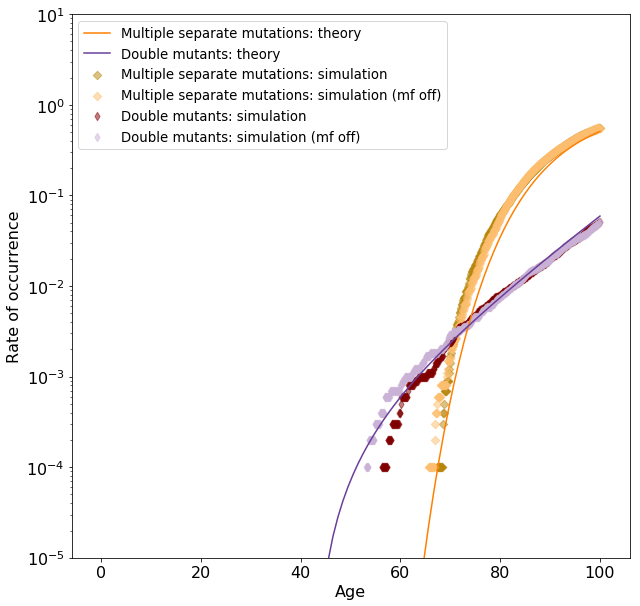

In [8]:
#single-valued landscape
from scipy import integrate
from scipy.integrate import quad

datafilename1='single_mutant_detection_rate_VAFlim_0.1_s_0.1_u_minus5_10000ppl_mf_on.csv'
datafilename2='double_mutant_detection_rate_VAFlim_0.1_s_0.1_u_minus5_10000ppl_mf_on.csv'
datafilename3='single_mutant_detection_rate_VAFlim_0.1_s_0.1_u_minus5_10000ppl_mf_off.csv'
datafilename4='double_mutant_detection_rate_VAFlim_0.1_s_0.1_u_minus5_10000ppl_mf_off.csv'

pop_size=10**5
N=pop_size
u=10**-5
s=0.1
alpha=2 #for the double mutant
f_max=0.4999999
t_max=100

VAF_lim=0.1
#average number of double mutant clone detected in a person
def prob_double_mutant_function(t, VAF_lim, f_max): 
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*(alpha*N*u**2/(alpha*s*(2*N*f/(1-2*f))+1))*((np.exp(s*t)/(alpha*s*(2*N*f/(1-2*f))+1)**(1/alpha))-1)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0

    return 1*result

#average number of separate mutations detected in a person
def prob_multiple_singles_function(t, VAF_lim, f_max): 
    n_tilde=(np.exp(s*t)-1)/s
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*N*u/(2*N*f/(1-2*f))*np.exp(-(2*N*f/(1-2*f))/n_tilde)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0

    return 1*result

plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(10,10))
plt.subplots_adjust(hspace = 0.7,wspace=0.35)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
#rate of co-occurrence using single-valued s



prob_separate_mutations_simulated=[]
prob_double_mutant_simulated=[]
prob_separate_mutations_simulated_mf_off=[]
prob_double_mutant_simulated_mf_off=[]


with open(datafilename1) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_separate_mutations_simulated.append(temp)     

with open(datafilename2) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_double_mutant_simulated.append(temp)     


with open(datafilename3) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_separate_mutations_simulated_mf_off.append(temp)     

with open(datafilename4) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_double_mutant_simulated_mf_off.append(temp)  



plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(10,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)




linear_age=np.linspace(0,t_max,100)
linear_age_simulated=np.linspace(0,t_max,t_max*10)
ymin=10**-12
ymax=10**1


# at least one double mutant
prob_double_mutant=[(1-np.exp(-prob_double_mutant_function(t, VAF_lim, f_max)))  for t in linear_age]  
#at least two separate mutations
prob_separate_mutations=[(1-np.exp(-prob_multiple_singles_function(t, VAF_lim, f_max))-\
                         prob_multiple_singles_function(t, VAF_lim, f_max)*np.exp(-prob_multiple_singles_function(t, VAF_lim, f_max))) for t in linear_age]   #includes 2 or more separate mutations





ax1.plot(linear_age, prob_separate_mutations, color=qualitative_10[7], label='Multiple separate mutations: theory')
ax1.scatter(linear_age_simulated, prob_separate_mutations_simulated, color='darkgoldenrod',marker='D', alpha=0.5, label='Multiple separate mutations: simulation')
ax1.scatter(linear_age_simulated, prob_separate_mutations_simulated_mf_off, color=qualitative_10[6],marker='D', alpha=0.5, label='Multiple separate mutations: simulation (mf off)')
ax1.plot(linear_age, prob_double_mutant, color=qualitative_10[9], label='Double mutants: theory')
ax1.scatter(linear_age_simulated, prob_double_mutant_simulated, color='maroon',marker='d',alpha=0.5, label='Double mutants: simulation')
ax1.scatter(linear_age_simulated, prob_double_mutant_simulated_mf_off, color=qualitative_10[8],marker='d',alpha=0.5, label='Double mutants: simulation (mf off)')

ax1.legend(loc=2, fontsize='small')
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
ax1.set_yscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('Rate of occurrence')
ax1.set_title('')
#ax1[0][0].set_xlim(xmin, xmax)
ax1.set_ylim(10**-5,10)                                                
#ax1.set_xticks(number_of_mutations);                                                                                            
#ax1.set_xticklabels(number_of_mutations);








    
#plt.savefig('Model_to_fit_prevalence_simulated_s_0_1_VAF_0_1_uminus5.pdf', bbox_inches='tight')

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in double_scalars


t_hit in future
t_hit single is 232.549996216004 and reduction is 3.132155515447212e-05
t_hit in future
t_hit single is 232.549996216004 and reduction is 3.132155515447212e-05
t_hit in future
t_hit single is 232.549996216004 and reduction is 3.132155515447212e-05
t_hit in future
t_hit single is 232.48439384222098 and reduction is 3.1308677626265076e-05
t_hit in future
t_hit single is 232.48439384222098 and reduction is 3.1308677626265076e-05
t_hit in future
t_hit single is 232.48439384222098 and reduction is 3.1308677626265076e-05
t_hit in future
t_hit single is 232.41883216015754 and reduction is 3.129580179596604e-05
t_hit in future
t_hit single is 232.41883216015754 and reduction is 3.129580179596604e-05
t_hit in future
t_hit single is 232.41883216015754 and reduction is 3.129580179596604e-05
t_hit in future
t_hit single is 232.35331122687916 and reduction is 3.1282927809465e-05
t_hit in future
t_hit single is 232.35331122687916 and reduction is 3.1282927809465e-05
t_hit in future
t

t_hit in future
t_hit single is 230.40691737166225 and reduction is 3.089821661825898e-05
t_hit in future
t_hit single is 230.40691737166225 and reduction is 3.089821661825898e-05
t_hit in future
t_hit single is 230.342688343557 and reduction is 3.0885462522732435e-05
t_hit in future
t_hit single is 230.342688343557 and reduction is 3.0885462522732435e-05
t_hit in future
t_hit single is 230.342688343557 and reduction is 3.0885462522732435e-05
t_hit in future
t_hit single is 230.27850192790234 and reduction is 3.0872714017263966e-05
t_hit in future
t_hit single is 230.27850192790234 and reduction is 3.0872714017263966e-05
t_hit in future
t_hit single is 230.27850192790234 and reduction is 3.0872714017263966e-05
t_hit in future
t_hit single is 230.2143581841099 and reduction is 3.085997119159891e-05
t_hit in future
t_hit single is 230.2143581841099 and reduction is 3.085997119159891e-05
t_hit in future
t_hit single is 230.2143581841099 and reduction is 3.085997119159891e-05
t_hit in futu

t_hit in future
t_hit single is 228.2473948023696 and reduction is 3.0468184208664812e-05
t_hit in future
t_hit single is 228.18464835072695 and reduction is 3.0455662153766624e-05
t_hit in future
t_hit single is 228.18464835072695 and reduction is 3.0455662153766624e-05
t_hit in future
t_hit single is 228.18464835072695 and reduction is 3.0455662153766624e-05
t_hit in future
t_hit single is 228.12194657115882 and reduction is 3.0443147983733113e-05
t_hit in future
t_hit single is 228.12194657115882 and reduction is 3.0443147983733113e-05
t_hit in future
t_hit single is 228.12194657115882 and reduction is 3.0443147983733113e-05
t_hit in future
t_hit single is 228.05928952547242 and reduction is 3.0430641745924046e-05
t_hit in future
t_hit single is 228.05928952547242 and reduction is 3.0430641745924046e-05
t_hit in future
t_hit single is 228.05928952547242 and reduction is 3.0430641745924046e-05
t_hit in future
t_hit single is 227.99667727554484 and reduction is 3.0418143486764383e-05


t_hit in future
t_hit single is 225.7729979630872 and reduction is 2.997384599791472e-05
t_hit in future
t_hit single is 225.7120872898087 and reduction is 2.996166859440959e-05
t_hit in future
t_hit single is 225.7120872898087 and reduction is 2.996166859440959e-05
t_hit in future
t_hit single is 225.7120872898087 and reduction is 2.996166859440959e-05
t_hit in future
t_hit single is 225.6512238148871 and reduction is 2.9949500405615298e-05
t_hit in future
t_hit single is 225.6512238148871 and reduction is 2.9949500405615298e-05
t_hit in future
t_hit single is 225.6512238148871 and reduction is 2.9949500405615298e-05
t_hit in future
t_hit single is 225.5904076028827 and reduction is 2.993734145404388e-05
t_hit in future
t_hit single is 225.5904076028827 and reduction is 2.993734145404388e-05
t_hit in future
t_hit single is 225.5904076028827 and reduction is 2.993734145404388e-05
t_hit in future
t_hit single is 225.5296387184234 and reduction is 2.992519176186561e-05
t_hit in future
t_

t_hit in future
t_hit single is 223.07967011239467 and reduction is 2.9435265232557494e-05
t_hit in future
t_hit single is 223.07967011239467 and reduction is 2.9435265232557494e-05
t_hit in future
t_hit single is 223.07967011239467 and reduction is 2.9435265232557494e-05
t_hit in future
t_hit single is 223.02094822583888 and reduction is 2.9423521260723393e-05
t_hit in future
t_hit single is 223.02094822583888 and reduction is 2.9423521260723393e-05
t_hit in future
t_hit single is 223.02094822583888 and reduction is 2.9423521260723393e-05
t_hit in future
t_hit single is 222.9622765085061 and reduction is 2.9411787298769296e-05
t_hit in future
t_hit single is 222.9622765085061 and reduction is 2.9411787298769296e-05
t_hit in future
t_hit single is 222.9622765085061 and reduction is 2.9411787298769296e-05
t_hit in future
t_hit single is 222.90365502790806 and reduction is 2.9400063361516012e-05
t_hit in future
t_hit single is 222.90365502790806 and reduction is 2.9400063361516012e-05
t_

t_hit single is 221.1687081074586 and reduction is 2.9053078641596617e-05
t_hit in future
t_hit single is 221.1687081074586 and reduction is 2.9053078641596617e-05
t_hit in future
t_hit single is 221.11167779129707 and reduction is 2.9041672626461834e-05
t_hit in future
t_hit single is 221.11167779129707 and reduction is 2.9041672626461834e-05
t_hit in future
t_hit single is 221.11167779129707 and reduction is 2.9041672626461834e-05
t_hit in future
t_hit single is 221.05469990493876 and reduction is 2.9030277094177978e-05
t_hit in future
t_hit single is 221.05469990493876 and reduction is 2.9030277094177978e-05
t_hit in future
t_hit single is 221.05469990493876 and reduction is 2.9030277094177978e-05
t_hit in future
t_hit single is 220.99777451791368 and reduction is 2.9018892058855016e-05
t_hit in future
t_hit single is 220.99777451791368 and reduction is 2.9018892058855016e-05
t_hit in future
t_hit single is 220.99777451791368 and reduction is 2.9018892058855016e-05
t_hit in future
t

t_hit single is 219.25950922554503 and reduction is 2.867123955537086e-05
t_hit in future
t_hit single is 219.25950922554503 and reduction is 2.867123955537086e-05
t_hit in future
t_hit single is 219.25950922554503 and reduction is 2.867123955537086e-05
t_hit in future
t_hit single is 219.20430087316328 and reduction is 2.866019789176574e-05
t_hit in future
t_hit single is 219.20430087316328 and reduction is 2.866019789176574e-05
t_hit in future
t_hit single is 219.20430087316328 and reduction is 2.866019789176574e-05
t_hit in future
t_hit single is 219.14914734659314 and reduction is 2.86491671930826e-05
t_hit in future
t_hit single is 219.14914734659314 and reduction is 2.86491671930826e-05
t_hit in future
t_hit single is 219.14914734659314 and reduction is 2.86491671930826e-05
t_hit in future
t_hit single is 219.09404871726912 and reduction is 2.8638147473628133e-05
t_hit in future
t_hit single is 219.09404871726912 and reduction is 2.8638147473628133e-05
t_hit in future
t_hit singl

t_hit in future
t_hit single is 217.25387262753355 and reduction is 2.8270112420369938e-05
t_hit in future
t_hit single is 217.25387262753355 and reduction is 2.8270112420369938e-05
t_hit in future
t_hit single is 217.25387262753355 and reduction is 2.8270112420369938e-05
t_hit in future
t_hit single is 217.20074080289487 and reduction is 2.8259486059892227e-05
t_hit in future
t_hit single is 217.20074080289487 and reduction is 2.8259486059892227e-05
t_hit in future
t_hit single is 217.20074080289487 and reduction is 2.8259486059892227e-05
t_hit in future
t_hit single is 217.14766648075476 and reduction is 2.8248871199922422e-05
t_hit in future
t_hit single is 217.14766648075476 and reduction is 2.8248871199922422e-05
t_hit in future
t_hit single is 217.14766648075476 and reduction is 2.8248871199922422e-05
t_hit in future
t_hit single is 217.09464973436408 and reduction is 2.8238267855111677e-05
t_hit in future
t_hit single is 217.09464973436408 and reduction is 2.8238267855111677e-05

t_hit single is 215.5312851646423 and reduction is 2.7925595082081618e-05
t_hit in future
t_hit single is 215.5312851646423 and reduction is 2.7925595082081618e-05
t_hit in future
t_hit single is 215.48008983309575 and reduction is 2.791535602074527e-05
t_hit in future
t_hit single is 215.48008983309575 and reduction is 2.791535602074527e-05
t_hit in future
t_hit single is 215.48008983309575 and reduction is 2.791535602074527e-05
t_hit in future
t_hit single is 215.4289544436006 and reduction is 2.7905128947838482e-05
t_hit in future
t_hit single is 215.4289544436006 and reduction is 2.7905128947838482e-05
t_hit in future
t_hit single is 215.4289544436006 and reduction is 2.7905128947838482e-05
t_hit in future
t_hit single is 215.37787907075045 and reduction is 2.7894913878280076e-05
t_hit in future
t_hit single is 215.37787907075045 and reduction is 2.7894913878280076e-05
t_hit in future
t_hit single is 215.37787907075045 and reduction is 2.7894913878280076e-05
t_hit in future
t_hit s

t_hit in future
t_hit single is 213.97243932281734 and reduction is 2.7613826077080656e-05
t_hit in future
t_hit single is 213.97243932281734 and reduction is 2.7613826077080656e-05
t_hit in future
t_hit single is 213.923137033579 and reduction is 2.760396562482582e-05
t_hit in future
t_hit single is 213.923137033579 and reduction is 2.760396562482582e-05
t_hit in future
t_hit single is 213.923137033579 and reduction is 2.760396562482582e-05
t_hit in future
t_hit single is 213.87389701421154 and reduction is 2.7594117626565664e-05
t_hit in future
t_hit single is 213.87389701421154 and reduction is 2.7594117626565664e-05
t_hit in future
t_hit single is 213.87389701421154 and reduction is 2.7594117626565664e-05
t_hit in future
t_hit single is 213.82471934028516 and reduction is 2.758428209741426e-05
t_hit in future
t_hit single is 213.82471934028516 and reduction is 2.758428209741426e-05
t_hit in future
t_hit single is 213.82471934028516 and reduction is 2.758428209741426e-05
t_hit in fu

t_hit single is 212.33154822859447 and reduction is 2.728564806000335e-05
t_hit in future
t_hit single is 212.33154822859447 and reduction is 2.728564806000335e-05
t_hit in future
t_hit single is 212.2844056520207 and reduction is 2.7276219550989688e-05
t_hit in future
t_hit single is 212.2844056520207 and reduction is 2.7276219550989688e-05
t_hit in future
t_hit single is 212.2844056520207 and reduction is 2.7276219550989688e-05
t_hit in future
t_hit single is 212.23732792745525 and reduction is 2.7266804012398742e-05
t_hit in future
t_hit single is 212.23732792745525 and reduction is 2.7266804012398742e-05
t_hit in future
t_hit single is 212.23732792745525 and reduction is 2.7266804012398742e-05
t_hit in future
t_hit single is 212.19031513117005 and reduction is 2.7257401459484922e-05
t_hit in future
t_hit single is 212.19031513117005 and reduction is 2.7257401459484922e-05
t_hit in future
t_hit single is 212.19031513117005 and reduction is 2.7257401459484922e-05
t_hit in future
t_hi

t_hit in future
t_hit single is 210.76553956256313 and reduction is 2.697244655285924e-05
t_hit in future
t_hit single is 210.76553956256313 and reduction is 2.697244655285924e-05
t_hit in future
t_hit single is 210.76553956256313 and reduction is 2.697244655285924e-05
t_hit in future
t_hit single is 210.72064480955635 and reduction is 2.6963467611339653e-05
t_hit in future
t_hit single is 210.72064480955635 and reduction is 2.6963467611339653e-05
t_hit in future
t_hit single is 210.72064480955635 and reduction is 2.6963467611339653e-05
t_hit in future
t_hit single is 210.67581750739964 and reduction is 2.6954502155880937e-05
t_hit in future
t_hit single is 210.67581750739964 and reduction is 2.6954502155880937e-05
t_hit in future
t_hit single is 210.67581750739964 and reduction is 2.6954502155880937e-05
t_hit in future
t_hit single is 210.63105773262296 and reduction is 2.6945550207984225e-05
t_hit in future
t_hit single is 210.63105773262296 and reduction is 2.6945550207984225e-05
t_

t_hit in future
t_hit single is 208.98097989016068 and reduction is 2.6615534923039744e-05
t_hit in future
t_hit single is 208.98097989016068 and reduction is 2.6615534923039744e-05
t_hit in future
t_hit single is 208.93891333423662 and reduction is 2.660712161971304e-05
t_hit in future
t_hit single is 208.93891333423662 and reduction is 2.660712161971304e-05
t_hit in future
t_hit single is 208.93891333423662 and reduction is 2.660712161971304e-05
t_hit in future
t_hit single is 208.8969173623183 and reduction is 2.659872243320734e-05
t_hit in future
t_hit single is 208.8969173623183 and reduction is 2.659872243320734e-05
t_hit in future
t_hit single is 208.8969173623183 and reduction is 2.659872243320734e-05
t_hit in future
t_hit single is 208.85499205057377 and reduction is 2.6590337378756217e-05
t_hit in future
t_hit single is 208.85499205057377 and reduction is 2.6590337378756217e-05
t_hit in future
t_hit single is 208.85499205057377 and reduction is 2.6590337378756217e-05
t_hit in

t_hit single is 207.43271223390252 and reduction is 2.630588170394187e-05
t_hit in future
t_hit single is 207.43271223390252 and reduction is 2.630588170394187e-05
t_hit in future
t_hit single is 207.39338122042776 and reduction is 2.6298015509823194e-05
t_hit in future
t_hit single is 207.39338122042776 and reduction is 2.6298015509823194e-05
t_hit in future
t_hit single is 207.39338122042776 and reduction is 2.6298015509823194e-05
t_hit in future
t_hit single is 207.35412366784556 and reduction is 2.629016400790072e-05
t_hit in future
t_hit single is 207.35412366784556 and reduction is 2.629016400790072e-05
t_hit in future
t_hit single is 207.35412366784556 and reduction is 2.629016400790072e-05
t_hit in future
t_hit single is 207.31493965124983 and reduction is 2.628232721319315e-05
t_hit in future
t_hit single is 207.31493965124983 and reduction is 2.628232721319315e-05
t_hit in future
t_hit single is 207.31493965124983 and reduction is 2.628232721319315e-05
t_hit in future
t_hit s

t_hit in future
t_hit single is 205.48655637023415 and reduction is 2.591665099876243e-05
t_hit in future
t_hit single is 205.48655637023415 and reduction is 2.591665099876243e-05
t_hit in future
t_hit single is 205.48655637023415 and reduction is 2.591665099876243e-05
t_hit in future
t_hit single is 205.45114389471672 and reduction is 2.5909568513037898e-05
t_hit in future
t_hit single is 205.45114389471672 and reduction is 2.5909568513037898e-05
t_hit in future
t_hit single is 205.45114389471672 and reduction is 2.5909568513037898e-05
t_hit in future
t_hit single is 205.41580872147037 and reduction is 2.5902501487780275e-05
t_hit in future
t_hit single is 205.41580872147037 and reduction is 2.5902501487780275e-05
t_hit in future
t_hit single is 205.41580872147037 and reduction is 2.5902501487780275e-05
t_hit in future
t_hit single is 205.380550922835 and reduction is 2.589544993745742e-05
t_hit in future
t_hit single is 205.380550922835 and reduction is 2.589544993745742e-05
t_hit in

t_hit in future
t_hit single is 203.9386764729888 and reduction is 2.5607075461913364e-05
t_hit in future
t_hit single is 203.9386764729888 and reduction is 2.5607075461913364e-05
t_hit in future
t_hit single is 203.90689363618563 and reduction is 2.5600718904377792e-05
t_hit in future
t_hit single is 203.90689363618563 and reduction is 2.5600718904377792e-05
t_hit in future
t_hit single is 203.90689363618563 and reduction is 2.5600718904377792e-05
t_hit in future
t_hit single is 203.8751913492367 and reduction is 2.5594378456819336e-05
t_hit in future
t_hit single is 203.8751913492367 and reduction is 2.5594378456819336e-05
t_hit in future
t_hit single is 203.8751913492367 and reduction is 2.5594378456819336e-05
t_hit in future
t_hit single is 203.84356968070153 and reduction is 2.5588054132949716e-05
t_hit in future
t_hit single is 203.84356968070153 and reduction is 2.5588054132949716e-05
t_hit in future
t_hit single is 203.84356968070153 and reduction is 2.5588054132949716e-05
t_hi

t_hit in future
t_hit single is 202.5610591437322 and reduction is 2.5331552451925537e-05
t_hit in future
t_hit single is 202.5610591437322 and reduction is 2.5331552451925537e-05
t_hit in future
t_hit single is 202.5330509860562 and reduction is 2.5325950830325715e-05
t_hit in future
t_hit single is 202.5330509860562 and reduction is 2.5325950830325715e-05
t_hit in future
t_hit single is 202.5330509860562 and reduction is 2.5325950830325715e-05
t_hit in future
t_hit single is 202.50512642212357 and reduction is 2.5320365927472634e-05
t_hit in future
t_hit single is 202.50512642212357 and reduction is 2.5320365927472634e-05
t_hit in future
t_hit single is 202.50512642212357 and reduction is 2.5320365927472634e-05
t_hit in future
t_hit single is 202.47728551538196 and reduction is 2.5314797756055665e-05
t_hit in future
t_hit single is 202.47728551538196 and reduction is 2.5314797756055665e-05
t_hit in future
t_hit single is 202.47728551538196 and reduction is 2.5314797756055665e-05
t_hi

t_hit in future
t_hit single is 201.24051339960366 and reduction is 2.506744380316817e-05
t_hit in future
t_hit single is 201.24051339960366 and reduction is 2.506744380316817e-05
t_hit in future
t_hit single is 201.24051339960366 and reduction is 2.506744380316817e-05
t_hit in future
t_hit single is 201.2168466323043 and reduction is 2.50627104592865e-05
t_hit in future
t_hit single is 201.2168466323043 and reduction is 2.50627104592865e-05
t_hit in future
t_hit single is 201.2168466323043 and reduction is 2.50627104592865e-05
t_hit in future
t_hit single is 201.19326652048616 and reduction is 2.5057994446488573e-05
t_hit in future
t_hit single is 201.19326652048616 and reduction is 2.5057994446488573e-05
t_hit in future
t_hit single is 201.19326652048616 and reduction is 2.5057994446488573e-05
t_hit in future
t_hit single is 201.1697731203539 and reduction is 2.50532957760151e-05
t_hit in future
t_hit single is 201.1697731203539 and reduction is 2.50532957760151e-05
t_hit in future
t

t_hit single is 200.40255719353405 and reduction is 2.489985291527971e-05
t_hit in future
t_hit single is 200.40255719353405 and reduction is 2.489985291527971e-05
t_hit in future
t_hit single is 200.382221465626 and reduction is 2.4895785778646057e-05
t_hit in future
t_hit single is 200.382221465626 and reduction is 2.4895785778646057e-05
t_hit in future
t_hit single is 200.382221465626 and reduction is 2.4895785778646057e-05
t_hit in future
t_hit single is 200.3619744125335 and reduction is 2.4891736376954587e-05
t_hit in future
t_hit single is 200.3619744125335 and reduction is 2.4891736376954587e-05
t_hit in future
t_hit single is 200.3619744125335 and reduction is 2.4891736376954587e-05
t_hit in future
t_hit single is 200.3418160840189 and reduction is 2.4887704720157562e-05
t_hit in future
t_hit single is 200.3418160840189 and reduction is 2.4887704720157562e-05
t_hit in future
t_hit single is 200.3418160840189 and reduction is 2.4887704720157562e-05
t_hit in future
t_hit single 

t_hit in future
t_hit single is 199.7785624349436 and reduction is 2.477505424658634e-05
t_hit in future
t_hit single is 199.76117823942565 and reduction is 2.477157741562332e-05
t_hit in future
t_hit single is 199.76117823942565 and reduction is 2.477157741562332e-05
t_hit in future
t_hit single is 199.76117823942565 and reduction is 2.477157741562332e-05
t_hit in future
t_hit single is 199.74388426220145 and reduction is 2.4768118628290863e-05
t_hit in future
t_hit single is 199.74388426220145 and reduction is 2.4768118628290863e-05
t_hit in future
t_hit single is 199.74388426220145 and reduction is 2.4768118628290863e-05
t_hit in future
t_hit single is 199.7266805467625 and reduction is 2.4764677893287066e-05
t_hit in future
t_hit single is 199.7266805467625 and reduction is 2.4764677893287066e-05
t_hit in future
t_hit single is 199.7266805467625 and reduction is 2.4764677893287066e-05
t_hit in future
t_hit single is 199.70956713640112 and reduction is 2.4761255219270145e-05
t_hit i

t_hit in future
t_hit single is 199.26722490132815 and reduction is 2.4672786985323934e-05
t_hit in future
t_hit single is 199.25274825629802 and reduction is 2.4669891663451578e-05
t_hit in future
t_hit single is 199.25274825629802 and reduction is 2.4669891663451578e-05
t_hit in future
t_hit single is 199.25274825629802 and reduction is 2.4669891663451578e-05
t_hit in future
t_hit single is 199.2383631199376 and reduction is 2.4667014643278306e-05
t_hit in future
t_hit single is 199.2383631199376 and reduction is 2.4667014643278306e-05
t_hit in future
t_hit single is 199.2383631199376 and reduction is 2.4667014643278306e-05
t_hit in future
t_hit single is 199.2240695291127 and reduction is 2.4664155932177086e-05
t_hit in future
t_hit single is 199.2240695291127 and reduction is 2.4664155932177086e-05
t_hit in future
t_hit single is 199.2240695291127 and reduction is 2.4664155932177086e-05
t_hit in future
t_hit single is 199.20986752047426 and reduction is 2.4661315537477897e-05
t_hit

t_hit single is 198.81521986911653 and reduction is 2.45823862065622e-05
t_hit in future
t_hit single is 198.81521986911653 and reduction is 2.45823862065622e-05
t_hit in future
t_hit single is 198.81521986911653 and reduction is 2.45823862065622e-05
t_hit in future
t_hit single is 198.8039665324096 and reduction is 2.45801355450216e-05
t_hit in future
t_hit single is 198.8039665324096 and reduction is 2.45801355450216e-05
t_hit in future
t_hit single is 198.8039665324096 and reduction is 2.45801355450216e-05
t_hit in future
t_hit single is 198.79280586388884 and reduction is 2.4577903417076908e-05
t_hit in future
t_hit single is 198.79280586388884 and reduction is 2.4577903417076908e-05
t_hit in future
t_hit single is 198.79280586388884 and reduction is 2.4577903417076908e-05
t_hit in future
t_hit single is 198.78173789263917 and reduction is 2.457568982854496e-05
t_hit in future
t_hit single is 198.78173789263917 and reduction is 2.457568982854496e-05
t_hit in future
t_hit single is 

t_hit in future
t_hit single is 198.3800472065684 and reduction is 2.449535190319545e-05
t_hit in future
t_hit single is 198.3800472065684 and reduction is 2.449535190319545e-05
t_hit in future
t_hit single is 198.37327071292714 and reduction is 2.449399660811485e-05
t_hit in future
t_hit single is 198.37327071292714 and reduction is 2.449399660811485e-05
t_hit in future
t_hit single is 198.37327071292714 and reduction is 2.449399660811485e-05
t_hit in future
t_hit single is 198.36658801875433 and reduction is 2.4492660072879857e-05
t_hit in future
t_hit single is 198.36658801875433 and reduction is 2.4492660072879857e-05
t_hit in future
t_hit single is 198.36658801875433 and reduction is 2.4492660072879857e-05
t_hit in future
t_hit single is 198.3599991417478 and reduction is 2.4491342301029948e-05
t_hit in future
t_hit single is 198.3599991417478 and reduction is 2.4491342301029948e-05
t_hit in future
t_hit single is 198.3599991417478 and reduction is 2.4491342301029948e-05
t_hit in 

t_hit single is 198.15237213634876 and reduction is 2.4449817013067927e-05
t_hit in future
t_hit single is 198.15237213634876 and reduction is 2.4449817013067927e-05
t_hit in future
t_hit single is 198.15237213634876 and reduction is 2.4449817013067927e-05
t_hit in future
t_hit single is 198.15049123375286 and reduction is 2.4449440833584266e-05
t_hit in future
t_hit single is 198.15049123375286 and reduction is 2.4449440833584266e-05
t_hit in future
t_hit single is 198.15049123375286 and reduction is 2.4449440833584266e-05
t_hit in future
t_hit single is 198.1487047230182 and reduction is 2.4449083532421054e-05
t_hit in future
t_hit single is 198.1487047230182 and reduction is 2.4449083532421054e-05
t_hit in future
t_hit single is 198.1487047230182 and reduction is 2.4449083532421054e-05
t_hit in future
t_hit single is 198.14701260891545 and reduction is 2.444874511053241e-05
t_hit in future
t_hit single is 198.14701260891545 and reduction is 2.444874511053241e-05
t_hit in future
t_hi

t_hit single is 198.14015696873088 and reduction is 2.4447373986272755e-05
t_hit in future
t_hit single is 198.14015696873088 and reduction is 2.4447373986272755e-05
t_hit in future
t_hit single is 198.1413921410882 and reduction is 2.4447621020063494e-05
t_hit in future
t_hit single is 198.1413921410882 and reduction is 2.4447621020063494e-05
t_hit in future
t_hit single is 198.1413921410882 and reduction is 2.4447621020063494e-05
t_hit in future
t_hit single is 198.14272172960807 and reduction is 2.4447886937034787e-05
t_hit in future
t_hit single is 198.14272172960807 and reduction is 2.4447886937034787e-05
t_hit in future
t_hit single is 198.14272172960807 and reduction is 2.4447886937034787e-05
t_hit in future
t_hit single is 198.144145730739 and reduction is 2.4448171736476382e-05
t_hit in future
t_hit single is 198.144145730739 and reduction is 2.4448171736476382e-05
t_hit in future
t_hit single is 198.144145730739 and reduction is 2.4448171736476382e-05
t_hit in future
t_hit si

t_hit in future
t_hit single is 198.22232694559548 and reduction is 2.446380793654238e-05
t_hit in future
t_hit single is 198.22232694559548 and reduction is 2.446380793654238e-05
t_hit in future
t_hit single is 198.2264862370118 and reduction is 2.4464639792552438e-05
t_hit in future
t_hit single is 198.2264862370118 and reduction is 2.4464639792552438e-05
t_hit in future
t_hit single is 198.2264862370118 and reduction is 2.4464639792552438e-05
t_hit in future
t_hit single is 198.230739717652 and reduction is 2.446549048635677e-05
t_hit in future
t_hit single is 198.230739717652 and reduction is 2.446549048635677e-05
t_hit in future
t_hit single is 198.230739717652 and reduction is 2.446549048635677e-05
t_hit in future
t_hit single is 198.23508737619147 and reduction is 2.446636001569053e-05
t_hit in future
t_hit single is 198.23508737619147 and reduction is 2.446636001569053e-05
t_hit in future
t_hit single is 198.23508737619147 and reduction is 2.446636001569053e-05
t_hit in future


t_hit in future
t_hit single is 198.43130519496916 and reduction is 2.450560347336444e-05
t_hit in future
t_hit single is 198.43130519496916 and reduction is 2.450560347336444e-05
t_hit in future
t_hit single is 198.43130519496916 and reduction is 2.450560347336444e-05
t_hit in future
t_hit single is 198.43884639733253 and reduction is 2.4507111709801485e-05
t_hit in future
t_hit single is 198.43884639733253 and reduction is 2.4507111709801485e-05
t_hit in future
t_hit single is 198.43884639733253 and reduction is 2.4507111709801485e-05
t_hit in future
t_hit single is 198.44648122573682 and reduction is 2.4508638671399715e-05
t_hit in future
t_hit single is 198.44648122573682 and reduction is 2.4508638671399715e-05
t_hit in future
t_hit single is 198.44648122573682 and reduction is 2.4508638671399715e-05
t_hit in future
t_hit single is 198.45420966001805 and reduction is 2.4510184354126455e-05
t_hit in future
t_hit single is 198.45420966001805 and reduction is 2.4510184354126455e-05
t_

t_hit in future
t_hit single is 198.72947959972743 and reduction is 2.456523819704616e-05
t_hit in future
t_hit single is 198.72947959972743 and reduction is 2.456523819704616e-05
t_hit in future
t_hit single is 198.74009850985033 and reduction is 2.456736197355588e-05
t_hit in future
t_hit single is 198.74009850985033 and reduction is 2.456736197355588e-05
t_hit in future
t_hit single is 198.74009850985033 and reduction is 2.456736197355588e-05
t_hit in future
t_hit single is 198.75081025476456 and reduction is 2.4569504316981596e-05
t_hit in future
t_hit single is 198.75081025476456 and reduction is 2.4569504316981596e-05
t_hit in future
t_hit single is 198.75081025476456 and reduction is 2.4569504316981596e-05
t_hit in future
t_hit single is 198.76161480649986 and reduction is 2.45716652217294e-05
t_hit in future
t_hit single is 198.76161480649986 and reduction is 2.45716652217294e-05
t_hit in future
t_hit single is 198.76161480649986 and reduction is 2.45716652217294e-05
t_hit in f

t_hit single is 199.12875843566454 and reduction is 2.464509376084831e-05
t_hit in future
t_hit single is 199.12875843566454 and reduction is 2.464509376084831e-05
t_hit in future
t_hit single is 199.14242488092472 and reduction is 2.464782704308162e-05
t_hit in future
t_hit single is 199.14242488092472 and reduction is 2.464782704308162e-05
t_hit in future
t_hit single is 199.14242488092472 and reduction is 2.464782704308162e-05
t_hit in future
t_hit single is 199.15618311809567 and reduction is 2.4650578683660696e-05
t_hit in future
t_hit single is 199.15618311809567 and reduction is 2.4650578683660696e-05
t_hit in future
t_hit single is 199.15618311809567 and reduction is 2.4650578683660696e-05
t_hit in future
t_hit single is 199.170033111791 and reduction is 2.4653348675508455e-05
t_hit in future
t_hit single is 199.170033111791 and reduction is 2.4653348675508455e-05
t_hit in future
t_hit single is 199.170033111791 and reduction is 2.4653348675508455e-05
t_hit in future
t_hit sing

t_hit single is 199.6280153937188 and reduction is 2.4744944909310382e-05
t_hit in future
t_hit single is 199.64469111949086 and reduction is 2.474828004655101e-05
t_hit in future
t_hit single is 199.64469111949086 and reduction is 2.474828004655101e-05
t_hit in future
t_hit single is 199.64469111949086 and reduction is 2.474828004655101e-05
t_hit in future
t_hit single is 199.66145735704342 and reduction is 2.4751633286118076e-05
t_hit in future
t_hit single is 199.66145735704342 and reduction is 2.4751633286118076e-05
t_hit in future
t_hit single is 199.66145735704342 and reduction is 2.4751633286118076e-05
t_hit in future
t_hit single is 199.678314064056 and reduction is 2.47550046195477e-05
t_hit in future
t_hit single is 199.678314064056 and reduction is 2.47550046195477e-05
t_hit in future
t_hit single is 199.678314064056 and reduction is 2.47550046195477e-05
t_hit in future
t_hit single is 199.69526119800628 and reduction is 2.4758394038335627e-05
t_hit in future
t_hit single is

t_hit single is 200.24550472167587 and reduction is 2.4868442490487746e-05
t_hit in future
t_hit single is 200.24550472167587 and reduction is 2.4868442490487746e-05
t_hit in future
t_hit single is 200.24550472167587 and reduction is 2.4868442490487746e-05
t_hit in future
t_hit single is 200.26523292322062 and reduction is 2.4872388121996288e-05
t_hit in future
t_hit single is 200.26523292322062 and reduction is 2.4872388121996288e-05
t_hit in future
t_hit single is 200.26523292322062 and reduction is 2.4872388121996288e-05
t_hit in future
t_hit single is 200.28505008762573 and reduction is 2.4876351546054674e-05
t_hit in future
t_hit single is 200.28505008762573 and reduction is 2.4876351546054674e-05
t_hit in future
t_hit single is 200.28505008762573 and reduction is 2.4876351546054674e-05
t_hit in future
t_hit single is 200.30495616601044 and reduction is 2.4880332752886984e-05
t_hit in future
t_hit single is 200.30495616601044 and reduction is 2.4880332752886984e-05
t_hit in future

t_hit single is 200.94323370718456 and reduction is 2.5007987986658352e-05
t_hit in future
t_hit single is 200.94323370718456 and reduction is 2.5007987986658352e-05
t_hit in future
t_hit single is 200.96587089785712 and reduction is 2.5012515415376744e-05
t_hit in future
t_hit single is 200.96587089785712 and reduction is 2.5012515415376744e-05
t_hit in future
t_hit single is 200.96587089785712 and reduction is 2.5012515415376744e-05
t_hit in future
t_hit single is 200.98859534472996 and reduction is 2.5017060295320302e-05
t_hit in future
t_hit single is 200.98859534472996 and reduction is 2.5017060295320302e-05
t_hit in future
t_hit single is 200.98859534472996 and reduction is 2.5017060295320302e-05
t_hit in future
t_hit single is 201.0114069931831 and reduction is 2.5021622615565265e-05
t_hit in future
t_hit single is 201.0114069931831 and reduction is 2.5021622615565265e-05
t_hit in future
t_hit single is 201.0114069931831 and reduction is 2.5021622615565265e-05
t_hit in future
t_

t_hit single is 201.73602771161848 and reduction is 2.5166546470149377e-05
t_hit in future
t_hit single is 201.76151464928404 and reduction is 2.5171643847890323e-05
t_hit in future
t_hit single is 201.76151464928404 and reduction is 2.5171643847890323e-05
t_hit in future
t_hit single is 201.76151464928404 and reduction is 2.5171643847890323e-05
t_hit in future
t_hit single is 201.78708695759047 and reduction is 2.5176758299751703e-05
t_hit in future
t_hit single is 201.78708695759047 and reduction is 2.5176758299751703e-05
t_hit in future
t_hit single is 201.78708695759047 and reduction is 2.5176758299751703e-05
t_hit in future
t_hit single is 201.8127445768403 and reduction is 2.518188981379421e-05
t_hit in future
t_hit single is 201.8127445768403 and reduction is 2.518188981379421e-05
t_hit in future
t_hit single is 201.8127445768403 and reduction is 2.518188981379421e-05
t_hit in future
t_hit single is 201.83848744719273 and reduction is 2.5187038378049912e-05
t_hit in future
t_hit

t_hit in future
t_hit single is 202.59365243237622 and reduction is 2.533807109812745e-05
t_hit in future
t_hit single is 202.59365243237622 and reduction is 2.533807109812745e-05
t_hit in future
t_hit single is 202.62184093299058 and reduction is 2.5343708788311468e-05
t_hit in future
t_hit single is 202.62184093299058 and reduction is 2.5343708788311468e-05
t_hit in future
t_hit single is 202.62184093299058 and reduction is 2.5343708788311468e-05
t_hit in future
t_hit single is 202.650112826034 and reduction is 2.534936315697999e-05
t_hit in future
t_hit single is 202.650112826034 and reduction is 2.534936315697999e-05
t_hit in future
t_hit single is 202.650112826034 and reduction is 2.534936315697999e-05
t_hit in future
t_hit single is 202.67846804754086 and reduction is 2.5355034191340087e-05
t_hit in future
t_hit single is 202.67846804754086 and reduction is 2.5355034191340087e-05
t_hit in future
t_hit single is 202.67846804754086 and reduction is 2.5355034191340087e-05
t_hit in f

t_hit single is 203.6294435709461 and reduction is 2.5545228978437502e-05
t_hit in future
t_hit single is 203.6294435709461 and reduction is 2.5545228978437502e-05
t_hit in future
t_hit single is 203.66051197662927 and reduction is 2.5551442649699375e-05
t_hit in future
t_hit single is 203.66051197662927 and reduction is 2.5551442649699375e-05
t_hit in future
t_hit single is 203.66051197662927 and reduction is 2.5551442649699375e-05
t_hit in future
t_hit single is 203.6916614670459 and reduction is 2.5557672537912926e-05
t_hit in future
t_hit single is 203.6916614670459 and reduction is 2.5557672537912926e-05
t_hit in future
t_hit single is 203.6916614670459 and reduction is 2.5557672537912926e-05
t_hit in future
t_hit single is 203.72289197431132 and reduction is 2.5563918629501375e-05
t_hit in future
t_hit single is 203.72289197431132 and reduction is 2.5563918629501375e-05
t_hit in future
t_hit single is 203.72289197431132 and reduction is 2.5563918629501375e-05
t_hit in future
t_hi

t_hit in future
t_hit single is 205.42145612710286 and reduction is 2.5903630967403535e-05
t_hit in future
t_hit single is 205.42145612710286 and reduction is 2.5903630967403535e-05
t_hit in future
t_hit single is 205.45680367133218 and reduction is 2.5910700466859772e-05
t_hit in future
t_hit single is 205.45680367133218 and reduction is 2.5910700466859772e-05
t_hit in future
t_hit single is 205.45680367133218 and reduction is 2.5910700466859772e-05
t_hit in future
t_hit single is 205.49222850625392 and reduction is 2.591778542446721e-05
t_hit in future
t_hit single is 205.49222850625392 and reduction is 2.591778542446721e-05
t_hit in future
t_hit single is 205.49222850625392 and reduction is 2.591778542446721e-05
t_hit in future
t_hit single is 205.52773055944954 and reduction is 2.592488582574224e-05
t_hit in future
t_hit single is 205.52773055944954 and reduction is 2.592488582574224e-05
t_hit in future
t_hit single is 205.52773055944954 and reduction is 2.592488582574224e-05
t_hit

t_hit single is 207.12632957219944 and reduction is 2.6244605239309823e-05
t_hit in future
t_hit single is 207.12632957219944 and reduction is 2.6244605239309823e-05
t_hit in future
t_hit single is 207.12632957219944 and reduction is 2.6244605239309823e-05
t_hit in future
t_hit single is 207.16515661244796 and reduction is 2.6252370638663778e-05
t_hit in future
t_hit single is 207.16515661244796 and reduction is 2.6252370638663778e-05
t_hit in future
t_hit single is 207.16515661244796 and reduction is 2.6252370638663778e-05
t_hit in future
t_hit single is 207.20405755158475 and reduction is 2.6260150817812634e-05
t_hit in future
t_hit single is 207.20405755158475 and reduction is 2.6260150817812634e-05
t_hit in future
t_hit single is 207.20405755158475 and reduction is 2.6260150817812634e-05
t_hit in future
t_hit single is 207.2430323147076 and reduction is 2.626794576177602e-05
t_hit in future
t_hit single is 207.2430323147076 and reduction is 2.626794576177602e-05
t_hit in future
t_h

t_hit single is 208.44623031195306 and reduction is 2.6508585109793974e-05
t_hit in future
t_hit single is 208.44623031195306 and reduction is 2.6508585109793974e-05
t_hit in future
t_hit single is 208.48745626745267 and reduction is 2.6516830292803537e-05
t_hit in future
t_hit single is 208.48745626745267 and reduction is 2.6516830292803537e-05
t_hit in future
t_hit single is 208.48745626745267 and reduction is 2.6516830292803537e-05
t_hit in future
t_hit single is 208.52875363154013 and reduction is 2.6525089757550013e-05
t_hit in future
t_hit single is 208.52875363154013 and reduction is 2.6525089757550013e-05
t_hit in future
t_hit single is 208.52875363154013 and reduction is 2.6525089757550013e-05
t_hit in future
t_hit single is 208.5701223282541 and reduction is 2.6533363488841214e-05
t_hit in future
t_hit single is 208.5701223282541 and reduction is 2.6533363488841214e-05
t_hit in future
t_hit single is 208.5701223282541 and reduction is 2.6533363488841214e-05
t_hit in future
t_

t_hit in future
t_hit single is 209.75709783398992 and reduction is 2.677075837260224e-05
t_hit in future
t_hit single is 209.75709783398992 and reduction is 2.677075837260224e-05
t_hit in future
t_hit single is 209.75709783398992 and reduction is 2.677075837260224e-05
t_hit in future
t_hit single is 209.80050204500267 and reduction is 2.6779439207334306e-05
t_hit in future
t_hit single is 209.80050204500267 and reduction is 2.6779439207334306e-05
t_hit in future
t_hit single is 209.80050204500267 and reduction is 2.6779439207334306e-05
t_hit in future
t_hit single is 209.8439753012342 and reduction is 2.678813385113066e-05
t_hit in future
t_hit single is 209.8439753012342 and reduction is 2.678813385113066e-05
t_hit in future
t_hit single is 209.8439753012342 and reduction is 2.678813385113066e-05
t_hit in future
t_hit single is 209.88751752623233 and reduction is 2.679684228870091e-05
t_hit in future
t_hit single is 209.88751752623233 and reduction is 2.679684228870091e-05
t_hit in f

t_hit single is 211.36260173816777 and reduction is 2.709185889758993e-05
t_hit in future
t_hit single is 211.36260173816777 and reduction is 2.709185889758993e-05
t_hit in future
t_hit single is 211.36260173816777 and reduction is 2.709185889758993e-05
t_hit in future
t_hit single is 211.4084433803364 and reduction is 2.7101027219304393e-05
t_hit in future
t_hit single is 211.4084433803364 and reduction is 2.7101027219304393e-05
t_hit in future
t_hit single is 211.4084433803364 and reduction is 2.7101027219304393e-05
t_hit in future
t_hit single is 211.45435131349706 and reduction is 2.711020879923834e-05
t_hit in future
t_hit single is 211.45435131349706 and reduction is 2.711020879923834e-05
t_hit in future
t_hit single is 211.45435131349706 and reduction is 2.711020879923834e-05
t_hit in future
t_hit single is 211.50032546118348 and reduction is 2.7119403622098508e-05
t_hit in future
t_hit single is 211.50032546118348 and reduction is 2.7119403622098508e-05
t_hit in future
t_hit si

t_hit single is 212.9099607763925 and reduction is 2.740133049464416e-05
t_hit in future
t_hit single is 212.9099607763925 and reduction is 2.740133049464416e-05


Text(0.5, 1.0, '')

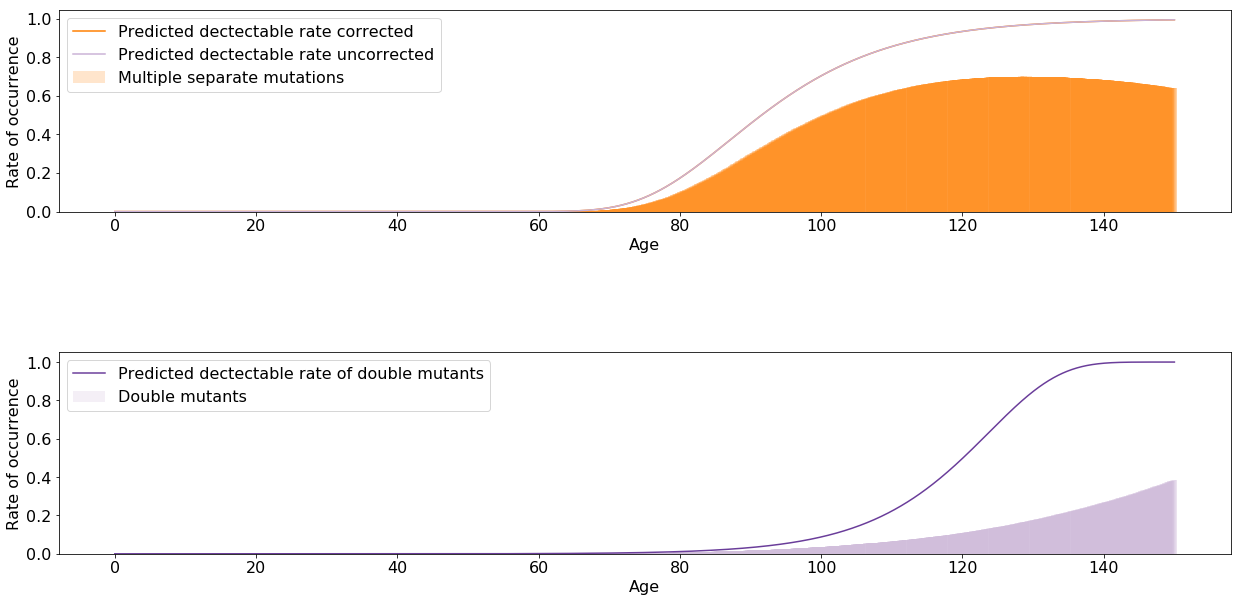

In [55]:
#reduction included: single-valued landscape
from scipy import integrate
from scipy.integrate import quad


pop_size=10**5
N=pop_size
u=10**-5
s=0.1
alpha=2 #for the double mutant
f_max=0.4999999

VAF_lim=0.05

def correction_to_doubles(t, VAF_lim, f_max):
    velocity=2*s**2*np.log(N*s)/(np.log(s/u))**2 + s
    if (9*s**2-2*velocity*s*t>=0):
        t_hit=(3*s  -  (9*s**2-2*velocity*s*t)**0.5)/velocity
        reduction =  u*3*s*prob_double_mutant_function(t_hit, VAF_lim, f_max)
        if (t_hit<0):
            #print('t_hit negative double')
            reduction = 0
            
    elif (9*s**2-2*velocity*s*t<0):
        reduction = 0
        #print('not valid double')
        
    
    return reduction

#average number of double mutant clone detected in a person
def prob_double_mutant_function(t, VAF_lim, f_max): 
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*(alpha*N*u**2/(alpha*s*(2*N*f/(1-2*f))+1))*((np.exp(s*t)/(alpha*s*(2*N*f/(1-2*f))+1)**(1/alpha))-1)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0
#     if (1-6*N*u**3*s**2*np.exp(s*t))<0:
#         result=0

#     return (1-6*N*u**3*s**2*np.exp(s*t))*result
#    corrected_result=correction_to_doubles(result, t, VAF_lim, f_max)
    return result

def correction_to_singles(t,  VAF_lim, f_max):
    velocity=2*s**2*np.log(N*s)/(np.log(s/u))**2
    if (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2)>=0):
        t_hit=(2*s  + (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2))**0.5)/velocity
        #t_hit=2*s/velocity
        reduction= u*2*s*prob_multiple_singles_function(t_hit, VAF_lim, f_max)
        if (t_hit<0):
            print('t_hit negative single')
            reduction = 0
        if (t_hit>t):
            print('t_hit in future')
            #reduction = 0
    elif (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2)<0):
        reduction = 0
        print('not valid single')
    print('t_hit single is', t_hit, 'and reduction is', reduction)    

    return reduction

#average number of separate mutations detected in a person
def prob_multiple_singles_function(t, VAF_lim, f_max): 
    n_tilde=(np.exp(s*t)-1)/s
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*N*u/(2*N*f/(1-2*f))*np.exp(-(2*N*f/(1-2*f))/n_tilde)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0
#     if (1-2*N*u**2*s**1*np.exp(s*t))<0:
#         result=0
#    return (1-2*N*u**2*s**1*np.exp(s*t))*result
#    corrected_result= correction_to_singles(result, t,  VAF_lim, f_max)
    return result

def check_positive(A,B):
    if (A>=B):
        result = A-B
        
    elif (A<B):
        result = 0
    return result

plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7,wspace=0.35)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
#rate of co-occurrence using single-valued s

datafilename1='single_mutant_detection_rate_VAFlim_0.05_s_0.1_u_minus5_60000ppl.csv'
datafilename2='double_mutant_detection_rate_VAFlim_0.05_s_0.1_u_minus5_60000_ppl.csv'

prob_separate_mutations_simulated=[]
prob_double_mutant_simulated=[]


with open(datafilename1) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_separate_mutations_simulated.append(temp)     

with open(datafilename2) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_double_mutant_simulated.append(temp)     






plt.close('all')
f, ax1 = plt.subplots(2, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)




linear_age=np.linspace(0,150,1500)
ymin=10**-12
ymax=10**1


# at least one double mutant
prob_double_mutant=[(1-np.exp(-(prob_double_mutant_function(t, VAF_lim, f_max)-correction_to_doubles(t,  VAF_lim, f_max))))                  for t in linear_age]  
#at least two separate mutations
prob_separate_mutations=[(1-np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max)))-\
                         (prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max))*\
                          np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max))))                         for t in linear_age]   #includes 2 or more separate mutations

prob_separate_mutations_uncorrected=[(1-np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)))-\
                         (prob_multiple_singles_function(t, VAF_lim, f_max))*\
                          np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max))))                         for t in linear_age]   #includes 2 or more separate mutations








ax1[0].plot(linear_age, prob_separate_mutations, color=qualitative_10[7], label='Predicted dectectable rate corrected')
ax1[0].bar(linear_age, prob_separate_mutations_simulated, color=qualitative_10[7], alpha=0.2, label='Multiple separate mutations')
ax1[0].plot(linear_age, prob_separate_mutations_uncorrected, color=qualitative_10[8], label='Predicted dectectable rate uncorrected')

ax1[0].legend()
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1.set_yscale('log')
ax1[0].set_xlabel('Age')
ax1[0].set_ylabel('Rate of occurrence')
ax1[0].set_title('')
#ax1[0][0].set_xlim(xmin, xmax)
#ax1[0].set_ylim(0,1)                                                
#ax1.set_xticks(number_of_mutations);                                                                                            
#ax1.set_xticklabels(number_of_mutations);



ax1[1].bar(linear_age, prob_double_mutant_simulated, color=qualitative_10[8], alpha=0.2, label='Double mutants')
ax1[1].plot(linear_age, prob_double_mutant, color=qualitative_10[9], label='Predicted dectectable rate of double mutants')
ax1[1].legend()
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1.set_yscale('log')
ax1[1].set_xlabel('Age')
ax1[1].set_ylabel('Rate of occurrence')
ax1[1].set_title('')
#ax1[0][0].set_xlim(xmin, xmax)
#ax1[1].set_ylim(0,1)                                                
#ax1.set_xticks(number_of_mutations);                                                                                            
#ax1.set_xticklabels(number_of_mutations);






    
#plt.savefig('Predicted_detectable_rate_single_valued_fitness_landscape_modified_simulated_15_percent.pdf', bbox_inches='tight')

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in double_scalars


Text(0.5, 1.0, '')

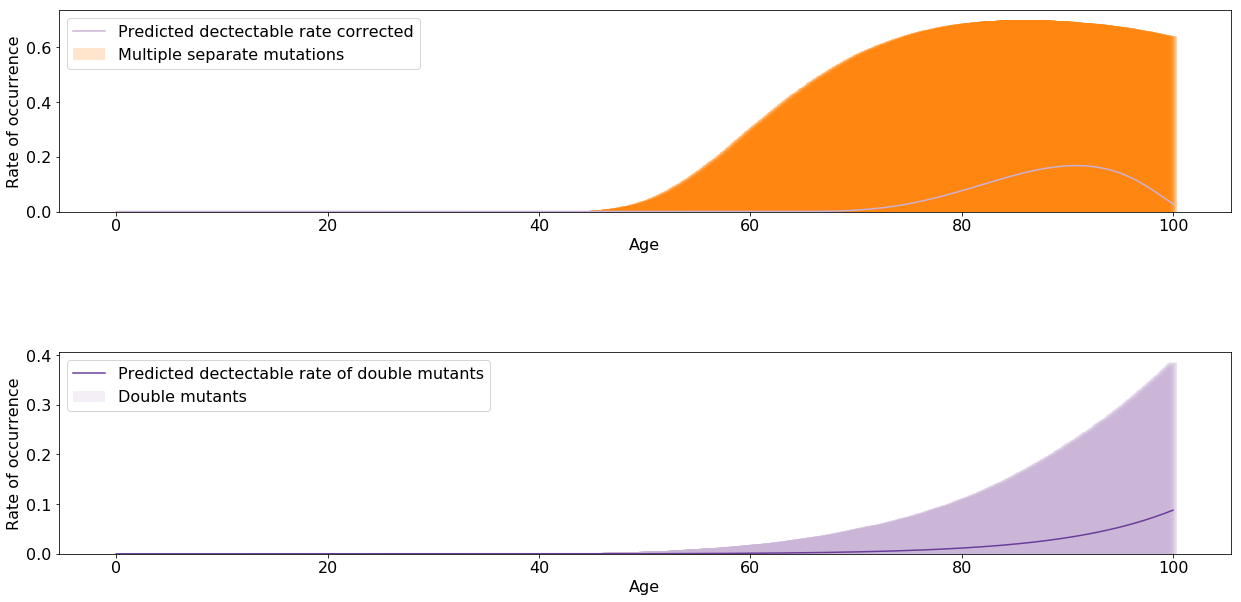

In [67]:
#method 2
#reduction included: single-valued landscape
from scipy import integrate
from scipy.integrate import quad


pop_size=10**5
N=pop_size
u=10**-5
s=0.1
alpha=2 #for the double mutant
f_max=0.4999999

VAF_lim=0.05

def correction_to_doubles(t, VAF_lim, f_max):
    velocity=2*s**2*np.log(N*s)/(np.log(s/u))**2 + s
    if (9*s**2-2*velocity*s*t>=0):
        t_hit=(3*s  -  (9*s**2-2*velocity*s*t)**0.5)/velocity
        reduction =  u*3*s*prob_double_mutant_function(t_hit, VAF_lim, f_max)
        if (t_hit<0):
            #print('t_hit negative double')
            reduction = 0
            
    elif (9*s**2-2*velocity*s*t<0):
        reduction = 0
        #print('not valid double')
        
    
    return reduction

#average number of double mutant clone detected in a person
def prob_double_mutant_function(t, VAF_lim, f_max): 
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*(alpha*N*u**2/(alpha*s*(2*N*f/(1-2*f))+1))*((np.exp(s*t)/(alpha*s*(2*N*f/(1-2*f))+1)**(1/alpha))-1)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0
#     if (1-6*N*u**3*s**2*np.exp(s*t))<0:
#         result=0

#     return (1-6*N*u**3*s**2*np.exp(s*t))*result
#    corrected_result=correction_to_doubles(result, t, VAF_lim, f_max)
    return result

def correction_to_singles(t,  VAF_lim, f_max):
    velocity=2*s**2*np.log(N*s)/(np.log(s/u))**2
    if (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2)>=0):
        t_hit=(2*s  + (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2))**0.5)/velocity
        #t_hit=2*s/velocity
        reduction= u*2*s*prob_multiple_singles_function(t_hit, VAF_lim, f_max)
        if (t_hit<0):
            print('t_hit negative single')
            reduction = 0
        if (t_hit>t):
            print('t_hit in future')
            #reduction = 0
    elif (4*s**2-2*velocity*(2*s*t-np.log(2*N)-velocity*t**2/2)<0):
        reduction = 0
        print('not valid single')
    print('t_hit single is', t_hit, 'and reduction is', reduction)    

    return reduction

#average number of separate mutations detected in a person
def prob_multiple_singles_function(t, VAF_lim, f_max): 
    n_tilde=(np.exp(s*t)-1)/s
    f_min=VAF_lim
    n_star=(np.exp(alpha*s*t)-1)/(alpha*s)
    f_star=n_star/(2*(N+n_star))
    if VAF_lim<f_star:
        if f_max>f_star:
            f_max=f_star
    f_spectrum= lambda f: (2*N/(1-2*f))*(1+(2*f/(1-2*f)))*N*u/(2*N*f/(1-2*f))*np.exp(-(2*N*f/(1-2*f))/n_tilde)
    result = integrate.quad(f_spectrum, f_min,f_max)[0]
    
    if VAF_lim>f_star:
        result=0
#     if (1-2*N*u**2*s**1*np.exp(s*t))<0:
#         result=0
#    return (1-2*N*u**2*s**1*np.exp(s*t))*result
    corrected_result= result- u*(np.exp(s*t)-1)/s
    return corrected_result

def check_positive(A,B):
    if (A>=B):
        result = A-B
        
    elif (A<B):
        result = 0
    return result

plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7,wspace=0.35)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)
#rate of co-occurrence using single-valued s

datafilename1='single_mutant_detection_rate_VAFlim_0.05_s_0.1_u_minus5_60000ppl.csv'
datafilename2='double_mutant_detection_rate_VAFlim_0.05_s_0.1_u_minus5_60000_ppl.csv'

prob_separate_mutations_simulated=[]
prob_double_mutant_simulated=[]


with open(datafilename1) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_separate_mutations_simulated.append(temp)     

with open(datafilename2) as data:
    reader = csv.reader(data,delimiter=',')
    next(reader, None)   #skips header
    for row in reader:
        try:            
            temp= float(row[1])
        except: # catch the error    
        #except IndexError: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
        #print((row[1]))
        prob_double_mutant_simulated.append(temp)     






plt.close('all')
f, ax1 = plt.subplots(2, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)




linear_age=np.linspace(0,100,1500)
ymin=10**-12
ymax=10**1


# at least one double mutant
prob_double_mutant=[(1-np.exp(-(prob_double_mutant_function(t, VAF_lim, f_max))))                  for t in linear_age]  
#at least two separate mutations
#prob_separate_mutations=[(1-np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max)))-\
#                         (prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max))*\
#                          np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)-correction_to_singles(t,  VAF_lim, f_max))))                         for t in linear_age]   #includes 2 or more separate mutations

prob_separate_mutations_corrected=[(1-np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max)))-\
                         (prob_multiple_singles_function(t, VAF_lim, f_max))*\
                          np.exp(-(prob_multiple_singles_function(t, VAF_lim, f_max))))                         for t in linear_age]   #includes 2 or more separate mutations








#ax1[0].plot(linear_age, prob_separate_mutations, color=qualitative_10[7], label='Predicted dectectable rate corrected')
ax1[0].bar(linear_age, prob_separate_mutations_simulated, color=qualitative_10[7], alpha=0.2, label='Multiple separate mutations')
ax1[0].plot(linear_age, prob_separate_mutations_corrected, color=qualitative_10[8], label='Predicted dectectable rate corrected')

ax1[0].legend()
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1.set_yscale('log')
ax1[0].set_xlabel('Age')
ax1[0].set_ylabel('Rate of occurrence')
ax1[0].set_title('')
#ax1[0][0].set_xlim(xmin, xmax)
#ax1[0].set_ylim(0,1)                                                
#ax1.set_xticks(number_of_mutations);                                                                                            
#ax1.set_xticklabels(number_of_mutations);



ax1[1].bar(linear_age, prob_double_mutant_simulated, color=qualitative_10[8], alpha=0.2, label='Double mutants')
ax1[1].plot(linear_age, prob_double_mutant, color=qualitative_10[9], label='Predicted dectectable rate of double mutants')
ax1[1].legend()
#ax1[0][0].plot([phi60 for i in range(100)], [10**(j/50 - 1) for j in range(100)], lw=2, linestyle = ':', color='k')
#ax1.set_yscale('log')
ax1[1].set_xlabel('Age')
ax1[1].set_ylabel('Rate of occurrence')
ax1[1].set_title('')
#ax1[0][0].set_xlim(xmin, xmax)
#ax1[1].set_ylim(0,1)                                                
#ax1.set_xticks(number_of_mutations);                                                                                            
#ax1.set_xticklabels(number_of_mutations);






    
#plt.savefig('Predicted_detectable_rate_single_valued_fitness_landscape_modified_simulated_15_percent.pdf', bbox_inches='tight')

Total participant number is  17182
[0.00018309205154005045, 0.000663059734177409, 0.0010649955403405124, 0.004461241521681688, 0.009708737864077669]


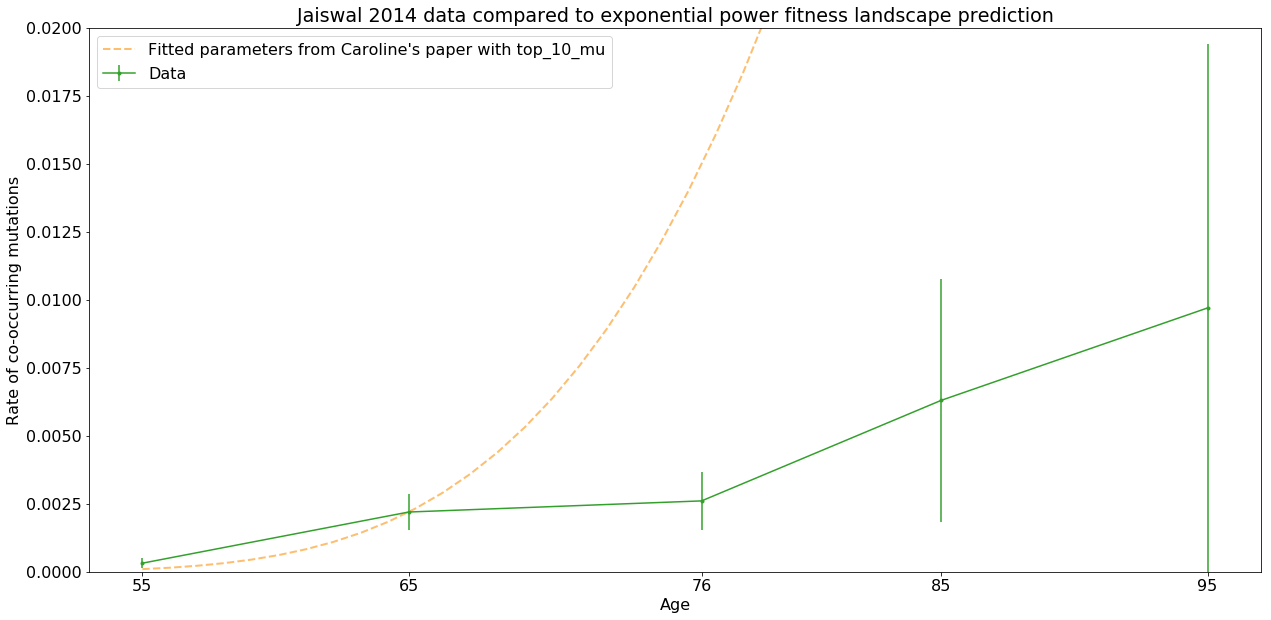

In [12]:
#rate of co-occurrence based on EXPONENTIAL POWER DISTRIBUTION

datafilename='all_studies_not_trimmed_all_genes_multiple_mutations.csv'
age_data='Jaiswal_age_data.csv'

target_study='Jaiswal 2014'
VAF_lim= 0.0556
pop_size=10**5
top_4_u=10**-6
pseudo_infinity=10**8
u=top_4_u
det_lim= VAF_lim*2
n_min=pop_size*det_lim
n_max=pseudo_infinity

b = 1.50725533e-01
d = 8.98941675e-09
s_max = 1.47963832e-01
s_peak=0
top_10_mu = 7.1039709e-05
u= top_10_mu
pop_size=9.39358404e+04


def nu(t,u): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: pop_size*u*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
    before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
    #nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
    nu = integrate.dblquad(before_wrt_l_log, 0, s_max, lambda s: np.log(n_min), lambda s: np.log(n_max))[0]
    return nu


counts_less60_ppl_with_at_least_another_coexisting_mutation=0
counts_60_ppl_with_at_least_another_coexisting_mutation=0
counts_70_ppl_with_at_least_another_coexisting_mutation=0
counts_80_ppl_with_at_least_another_coexisting_mutation=0
counts_great90_ppl_with_at_least_another_coexisting_mutation=0

base_number_less60=0
base_number_60=0
base_number_70=0
base_number_80=0
base_number_great90=0



with open(datafilename) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            #cannot assign without elliciting IndexError 
            Participant_ID= row[1]
            age=float(row[2])
            number_of_mutations= float(row[3])
            

            if row[0] == target_study:
                if row[9]!='':
                    if age<60:
                        counts_less60_ppl_with_at_least_another_coexisting_mutation=counts_less60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 60<=age<70:
                        counts_60_ppl_with_at_least_another_coexisting_mutation=counts_60_ppl_with_at_least_another_coexisting_mutation+1
                    elif 70<=age<80:
                        counts_70_ppl_with_at_least_another_coexisting_mutation=counts_70_ppl_with_at_least_another_coexisting_mutation+1
                    elif 80<=age<90:
                        counts_80_ppl_with_at_least_another_coexisting_mutation=counts_80_ppl_with_at_least_another_coexisting_mutation+1
                    elif age>=90:
                        counts_great90_ppl_with_at_least_another_coexisting_mutation=counts_great90_ppl_with_at_least_another_coexisting_mutation+1
                    else:
                        print('age is ', age)
                                         
        except: # catch the error
                pass # pass will basically ignore it
         # and execution will continue on to whatever comes
         # after the try/except block
#        cc=cc+1



with open(age_data) as data:
    reader = csv.reader(data,delimiter=',')
    #reader = csv.DictReader(data)
    for row in reader:
        try:
            age=float(row[0])
            if age != 0:
                if age<60:
                    base_number_less60=base_number_less60+1
                elif 60<=age<70:
                    base_number_60=base_number_60+1
                elif 70<=age<80:
                    base_number_70=base_number_70+1
                elif 80<=age<90:
                    base_number_80=base_number_80+1
                elif age>=90:
                    base_number_great90=base_number_great90+1
        except:
            pass

                    
print('Total participant number is ', (base_number_less60+base_number_60+base_number_70+base_number_80+base_number_great90) )
                    
#avoid dividing by 0
if base_number_less60==0:
    base_number_less60=1
if base_number_60==0:
    base_number_60=1
if base_number_70==0:
    base_number_70=1
if base_number_80==0:
    base_number_80=1
if base_number_great90==0:
    base_number_great90=1

    
#get the divided counts first   
Base_numbers=[base_number_less60, base_number_60, base_number_70, base_number_80, base_number_great90] 
counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation,counts_60_ppl_with_at_least_another_coexisting_mutation,\
        counts_70_ppl_with_at_least_another_coexisting_mutation,counts_80_ppl_with_at_least_another_coexisting_mutation,\
        counts_great90_ppl_with_at_least_another_coexisting_mutation]
Divided_counts=[counts_less60_ppl_with_at_least_another_coexisting_mutation/base_number_less60, counts_60_ppl_with_at_least_another_coexisting_mutation/base_number_60,\
                counts_70_ppl_with_at_least_another_coexisting_mutation/base_number_70, counts_80_ppl_with_at_least_another_coexisting_mutation/base_number_80,\
                counts_great90_ppl_with_at_least_another_coexisting_mutation/base_number_great90]
timepoints=[55,65,76,85,95]




#this no longer affects the divided counts
#avoid dividing by 0
if counts[0]==0:
    counts[0]=1
if counts[1]==0:
    counts[1]=1
if counts[2]==0:
    counts[2]=1
if counts[3]==0:
    counts[3]=1
if counts[4]==0:
    counts[4]=1



Errors=[Divided_counts[0]/(counts[0])**0.5,Divided_counts[1]/(counts[1])**0.5,Divided_counts[2]/(counts[2])**0.5\
        ,Divided_counts[3]/(counts[3])**0.5,Divided_counts[4]/(counts[4])**0.5]




plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


#average_number_of_ben_mutations = pop_size*u*(expi(-pop_size/((np.exp(s*t)-1)/s))-expi(-pop_size*det_lim/((np.exp(s*t)-1)/s)))    #in an individual

u=top_10_mu
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[6], label='Fitted parameters from Caroline\'s paper with top_10_mu')

u=1.54*10**-6
linear_age=np.array(np.linspace(55,95,(95-55))) 
weight_s= lambda s: np.exp(-((abs(s-s_peak))/d)**b)
normalization=integrate.quad(weight_s, 0.0, s_max)
#density_theory=[(1-np.exp(-nu(t,u))-(nu(t,u))*(np.exp(-nu(t,u)))) for t in linear_age]
#ax1.plot(linear_age, density_theory, lw=2, linestyle='dashed', color=qualitative_10[7], label='Fitted parameters from Caroline\'s paper: only DNMT3A')



#ax1[1][1].scatter(timepoints,Divided_counts, alpha=1.0, color=qualitative_10[3],                marker='.', s=100)
ax1.errorbar(timepoints,Divided_counts, yerr=Errors, alpha=1.0, color=qualitative_10[3], marker='.' , label='Data' )
#ax1.plot(linear_age, density_theory, lw=2, color='k', label='s=0.05')

#ax1[0][0].set_yscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('Rate of co-occurring mutations')
ax1.set_title('Jaiswal 2014 data compared to exponential power fitness landscape prediction')
ax1.legend()
#ax1[0][0].set_xlim(xmin, xmax)
ax1.set_ylim(0,0.02)                                                  
ax1.set_xticks(timepoints);                                                                                            
ax1.set_xticklabels(timepoints);

#print(Divided_counts)
print(Errors)
Errors=[]











#plt.savefig('Rate_of_coexisting_mutations_Jaiswal_fitted_parameter.pdf', bbox_inches='tight')

Total participant number is  17182


NameError: name 't' is not defined

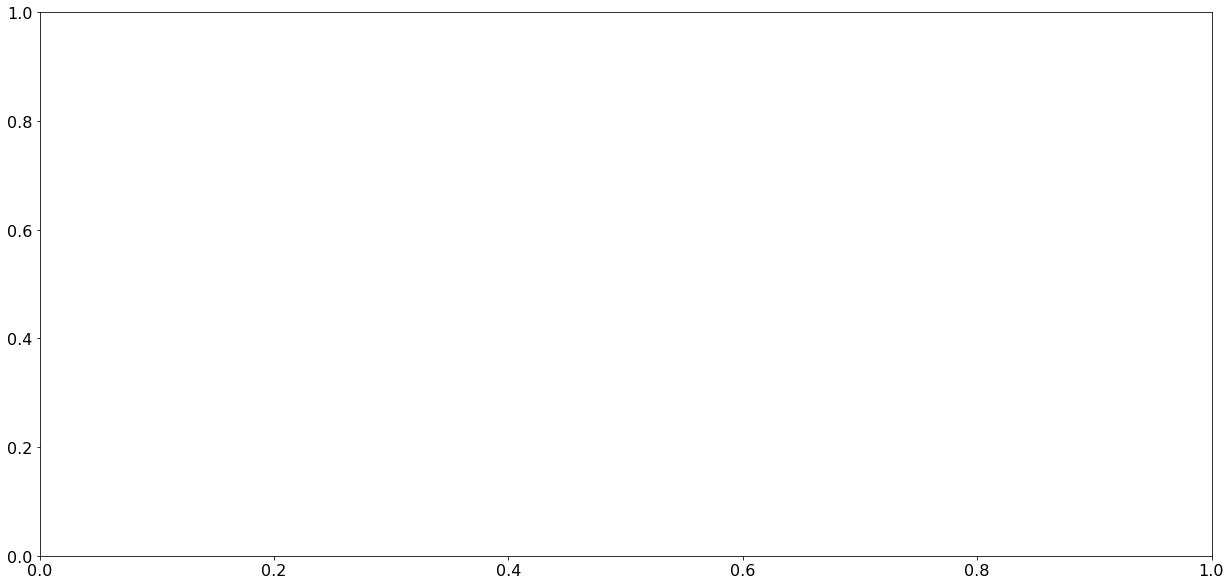

In [ ]:
from scipy.special import expi

In [ ]:
mu


In [ ]:
test=[nu(t) for t in linear_age]
test

In [ ]:
#EXPONENTIAL POWER DISTRIBUTION plot
s_max=0.145
expo_power_dist= lambda s: ((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))
linear_s=np.linspace(0,s_max,100)
plt.plot(linear_s,[u*expo_power_dist(s1) for s1 in linear_s])

In [ ]:
t=5
1-np.exp(-nu(t))-nu(t)*np.exp(-nu(t))

In [ ]:
density_theory=[(1-np.exp(-nu(t))-(nu(t))*(np.exp(-nu(t)))) for t in linear_age]

In [ ]:
def nu(t): 
    #normalized_rho_s= lambda s: (1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b)
    before_wrt_n= lambda n, s: n*(1-s)
    nu = integrate.dblquad(before_wrt_n, 0, 1)[0]
    return nu

In [ ]:
integrate.quad(expo_power_dist, 0, 1)[0]

In [ ]:
nu(120)

In [ ]:
integrate.dblquad(before_wrt_n, n_min, n_max, lambda s: 0, lambda s: s_max)

In [ ]:
t=1000
before_wrt_n= lambda n, s: pop_size*u*(1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/n*np.exp(-n/((np.exp(s*t)-1)/s))
before_wrt_l_log= lambda l, s: pop_size*u*np.exp(l)*((1.0/normalization[0])*np.exp(-((abs(s-s_peak))/d)**b))/np.exp(l)*np.exp(-np.exp(l)/((np.exp(s*t)-1)/s))
#nu = integrate.dblquad(before_wrt_n, n_min, n_min*4, lambda s: 0, lambda s: s_max)[0]
nu = integrate.dblquad(before_wrt_l_log, np.log(n_min), np.log(n_max), lambda s: 0, lambda s: s_max)[0]
nu

In [16]:
prob_separate_mutations[1200]

nan

In [17]:
prob_double_mutant[1200]

nan

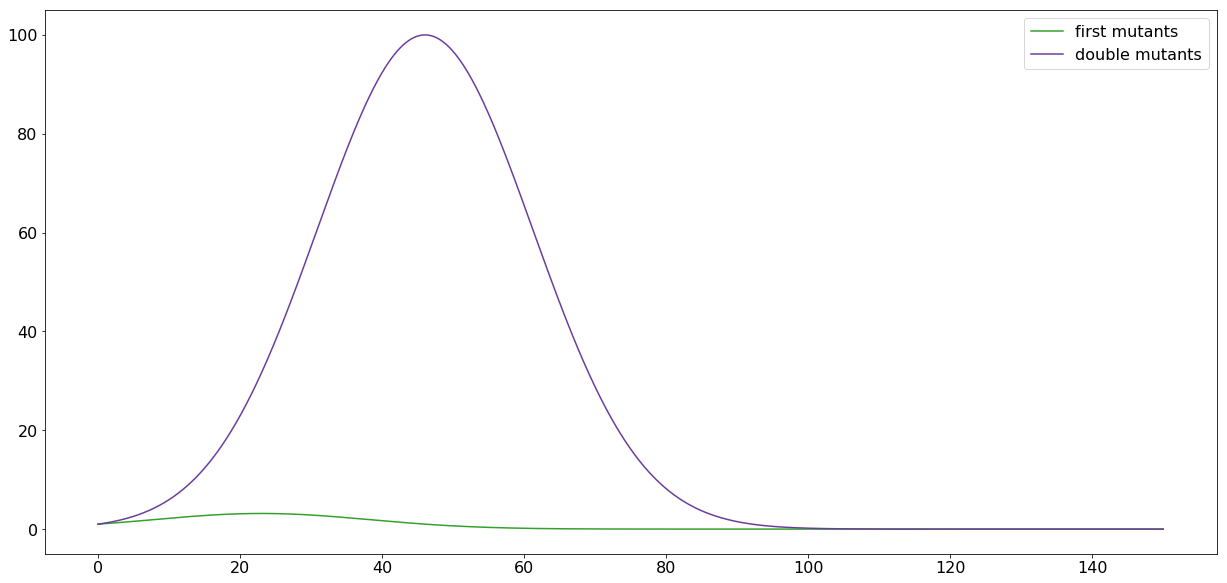

In [59]:
plt.close('all')
f, ax1 = plt.subplots(1, 1, figsize=(7*3,10))
plt.subplots_adjust(hspace = 0.7)  
font = {'weight' : 'normal','size'   : 16}
matplotlib.rc('font', **font)


linear_age=np.linspace(0,150,1500)

v=2*s**2*np.log(N*s)/(np.log(s/u))**2
#first_mutant=[integrate.quad(lambda x: np.exp(((s-v*x)*x)), 0, t)[0] for t in linear_age]
#double_mutant=[integrate.quad(lambda x: np.exp(((2*s-v*x)*x)), 80, t)[0] for t in linear_age]
first_mutant=[(np.exp(((s-v*t)*t))) for t in linear_age]
double_mutant=[(np.exp(((2*s-v*t)*t))) for t in linear_age]

ax1.plot(linear_age, first_mutant, color=qualitative_10[3], label='first mutants')
ax1.plot(linear_age, double_mutant, color=qualitative_10[9], label='double mutants')
ax1.legend()

In [41]:
2*s/v

64.10536986722899

In [48]:
print(prob_double_mutant_function(149, VAF_lim, f_max))

11744.948081469238


In [49]:
u*10000*s

0.015

In [54]:
prob_multiple_singles_function(92, VAF_lim, f_max)

1.7187702985295168